In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


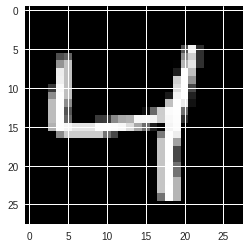

In [2]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [0]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
# Create the session
sess = tf.Session()

In [5]:
epochs = 200
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)
    
    if( (e+1) % 10 == 0):
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 10/200... Training loss: 0.0953
Epoch: 20/200... Training loss: 0.0939
Epoch: 30/200... Training loss: 0.0936
Epoch: 40/200... Training loss: 0.0921
Epoch: 50/200... Training loss: 0.0926
Epoch: 60/200... Training loss: 0.0936
Epoch: 70/200... Training loss: 0.0938
Epoch: 80/200... Training loss: 0.0937
Epoch: 90/200... Training loss: 0.0912
Epoch: 100/200... Training loss: 0.0936
Epoch: 110/200... Training loss: 0.0882
Epoch: 120/200... Training loss: 0.0924
Epoch: 130/200... Training loss: 0.0890
Epoch: 140/200... Training loss: 0.0912
Epoch: 150/200... Training loss: 0.0904
Epoch: 160/200... Training loss: 0.0918
Epoch: 170/200... Training loss: 0.0905
Epoch: 180/200... Training loss: 0.0916
Epoch: 190/200... Training loss: 0.0898
Epoch: 200/200... Training loss: 0.0900


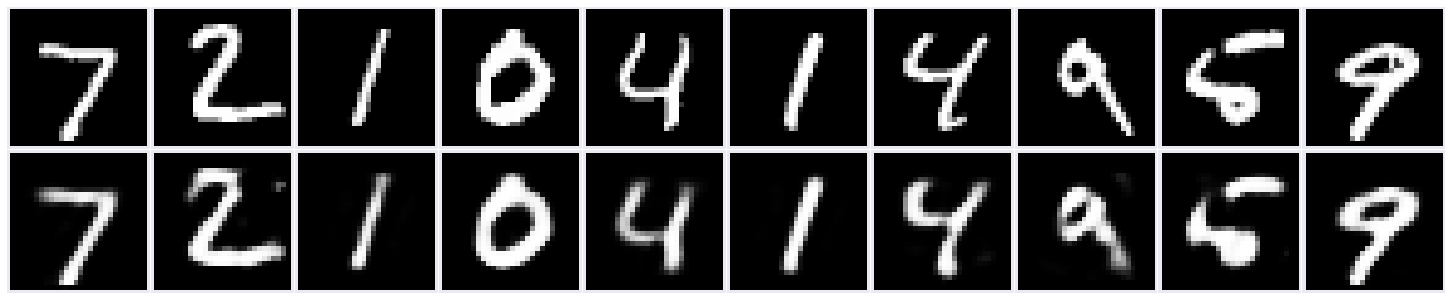

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [0]:
sess.close()